In [9]:
import pandas as pd

# Le chemin pointe maintenant vers le fichier train.csv dans le dossier input/
chemin_fichier = 'input/train.csv'

# Charger le fichier CSV dans un DataFrame pandas
donnees = pd.read_csv(chemin_fichier)

# Renommer les colonnes pour plus de clarté
donnees = donnees.rename(columns={'review': 'critique', 'polarity': 'sentiment'})

# Transformer les 0/1 en 'negatif'/'positif'
donnees['sentiment'] = donnees['sentiment'].map({0: 'negatif', 1: 'positif'})

# Afficher les 5 premières lignes et la taille du jeu de données pour vérifier
print(f"Le jeu de données d'entraînement a été chargé avec succès.")
print(f"Il contient {len(donnees)} critiques.")
donnees.head()

Le jeu de données d'entraînement a été chargé avec succès.
Il contient 160000 critiques.


,Unnamed: 0,film-url,critique,sentiment
0,0,http://www.allocine.fr/film/fichefilm-135259/c...,Si vous cherchez du cinéma abrutissant à tous ...,negatif
1,1,http://www.allocine.fr/film/fichefilm-172430/c...,"Trash, re-trash et re-re-trash...! Une horreur...",negatif
2,2,http://www.allocine.fr/film/fichefilm-15105/cr...,"Et si, dans les 5 premières minutes du film, l...",negatif
3,3,http://www.allocine.fr/film/fichefilm-188629/c...,Mon dieu ! Quelle métaphore filée ! Je suis ab...,negatif
4,4,http://www.allocine.fr/film/fichefilm-23514/cr...,"Premier film de la saga Kozure Okami, ""Le Sabr...",positif


In [10]:
# Lister les colonnes à supprimer
colonnes_a_supprimer = ['Unnamed: 0', 'film-url']

# Utiliser la méthode .drop() pour les enlever
# 'axis=1' signifie qu'on supprime des colonnes (axis=0 serait pour des lignes)
# 'inplace=True' modifie directement notre DataFrame 'donnees' sans avoir besoin de faire donnees = ...
donnees.drop(colonnes_a_supprimer, axis=1, inplace=True)

# Afficher à nouveau les 5 premières lignes pour vérifier que les colonnes ont disparu
print("Colonnes inutiles supprimées. Le DataFrame est maintenant plus propre :")
donnees.head()

Colonnes inutiles supprimées. Le DataFrame est maintenant plus propre :


,critique,sentiment
0,Si vous cherchez du cinéma abrutissant à tous ...,negatif
1,"Trash, re-trash et re-re-trash...! Une horreur...",negatif
2,"Et si, dans les 5 premières minutes du film, l...",negatif
3,Mon dieu ! Quelle métaphore filée ! Je suis ab...,negatif
4,"Premier film de la saga Kozure Okami, ""Le Sabr...",positif


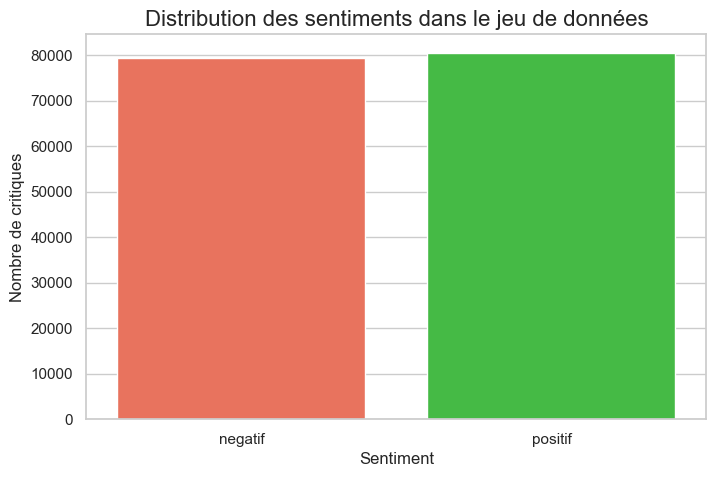


Chiffres exacts :
sentiment
positif    80587
negatif    79413
Name: count, dtype: int64


In [11]:
# Import des librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Réglage du style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))

# --- LIGNE CORRIGÉE ---
# On spécifie que la couleur (hue) dépend aussi de la colonne 'sentiment'
# et on désactive la légende qui n'est pas nécessaire ici.
sns.countplot(x='sentiment', data=donnees, hue='sentiment', palette=['#FF6347', '#32CD32'], order=['negatif', 'positif'], legend=False)
# --------------------

plt.title('Distribution des sentiments dans le jeu de données', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Nombre de critiques', fontsize=12)
plt.show()

print("\nChiffres exacts :")
print(donnees['sentiment'].value_counts())

In [12]:
# Installer la librairie NLTK directement depuis le notebook
import sys
!{sys.executable} -m pip install nltk

# Importer nltk et télécharger la liste des mots vides (stop words) pour le français
import nltk
nltk.download('stopwords')

print("\nLa liste des stop words a été téléchargée avec succès.")


La liste des stop words a été téléchargée avec succès.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lseddiki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import string
from nltk.corpus import stopwords

# Récupérer la liste des stop words français
stop_words_francais = set(stopwords.words('french'))

# On retire certains mots de la liste des stopwords car ils sont importants pour le sentiment.
mots_a_garder = {'pas', 'ne', 'plus', 'bien', 'trop', 'très'}
stop_words_francais = stop_words_francais - mots_a_garder

# On récupère la ponctuation de base, mais on lui dit de NE PAS supprimer l'apostrophe
ponctuation_a_supprimer = string.punctuation.replace("'", "")



def nettoyer_texte_v2(texte):
    """
    Cette fonction AMÉLIORÉE prend un texte en entrée et retourne une version nettoyée :
    1. Tout en minuscules.
    2. Remplace la ponctuation (sauf apostrophe) par des espaces pour ne pas coller les mots.
    3. Supprime les stop words français.
    """
    # 1. Mettre en minuscules
    texte = texte.lower()
    
    # 2. Remplacer chaque signe de ponctuation par un espace
    for char in ponctuation_a_supprimer:
        texte = texte.replace(char, ' ') # <-- Le changement clé est ici !
    
    # 3. Supprimer les stop words
    mots = texte.split()
    mots_filtres = [mot for mot in mots if mot not in stop_words_francais]
    
    # On ré-assemble la liste de mots filtrés en une seule chaîne de caractères
    texte_nettoye = " ".join(mots_filtres)
    
    return texte_nettoye

# --- TESTONS NOTRE NOUVELLE FONCTION ---
critique_test = donnees['critique'].iloc[0] # On prend la même critique
print("--- CRITIQUE ORIGINALE ---")
print(critique_test)
print("\n--- CRITIQUE NETTOYÉE (AVEC V2) ---")
print(nettoyer_texte_v2(critique_test))

--- CRITIQUE ORIGINALE ---
Si vous cherchez du cinéma abrutissant à tous les étages,n'ayant aucune peur du cliché en castagnettes et moralement douteux,"From Paris with love" est fait pour vous.Toutes les productions Besson,via sa filière EuropaCorp ont de quoi faire naître la moquerie.Paris y est encore une fois montrée comme une capitale exotique,mais attention si l'on se dirige vers la banlieue,on y trouve tout plein d'intégristes musulmans prêts à faire sauter le caisson d'une ambassadrice américaine.Nauséeux.Alors on se dit qu'on va au moins pouvoir apprécier la déconnade d'un classique buddy-movie avec le jeune agent aux dents longues obligé de faire équipe avec un vieux lou complètement timbré.Mais d'un côté,on a un Jonathan Rhys-meyers fayot au possible,et de l'autre un John Travolta en total délire narcissico-badass,crâne rasé et bouc proéminent à l'appui.Sinon,il n'y a aucun scénario.Seulement,des poursuites débiles sur l'autoroute,Travolta qui étale 10 mecs à l'arme blanche 

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm.auto import tqdm
tqdm.pandas()

# --- 1. CHARGEMENT DES DONNÉES ---
print("Chargement des 3 jeux de données...")
train_df = pd.read_csv('input/train.csv')
valid_df = pd.read_csv('input/valid.csv')
test_df = pd.read_csv('input/test.csv')

print(f"Train: {len(train_df)}, Validation: {len(valid_df)}, Test: {len(test_df)} critiques chargées.")

# --- 2. NETTOYAGE DES 3 DATASETS ---
# Nous appliquons notre fonction `nettoyer_texte_v2` (définie précédemment) à chaque dataset.
# Il est CRUCIAL que le nettoyage soit identique pour tous.

print("\nNettoyage du jeu d'entraînement...")
train_df['critique_nettoyee'] = train_df['review'].progress_apply(nettoyer_texte_v2)

print("Nettoyage du jeu de validation...")
valid_df['critique_nettoyee'] = valid_df['review'].progress_apply(nettoyer_texte_v2)

print("Nettoyage du jeu de test...")
test_df['critique_nettoyee'] = test_df['review'].progress_apply(nettoyer_texte_v2)

# --- 3. DÉFINITION DES X (critiques) et y (sentiments) ---
X_train = train_df['critique_nettoyee']
y_train = train_df['polarity'].map({0: 'negatif', 1: 'positif'}) # On fait le mapping ici

X_valid = valid_df['critique_nettoyee']
y_valid = valid_df['polarity'].map({0: 'negatif', 1: 'positif'})

X_test = test_df['critique_nettoyee']
y_test = test_df['polarity'].map({0: 'negatif', 1: 'positif'})

print("\nDonnées prêtes pour la vectorisation.")

# --- 4. VECTORISATION TF-IDF (la bonne méthode) ---
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# On ENTRAÎNE (fit) le vectoriseur UNIQUEMENT sur les données d'entraînement.
print("\nEntraînement du vectoriseur sur les données d'entraînement...")
X_train_vect = vectorizer.fit_transform(X_train)

# On applique ensuite cette transformation aux autres jeux de données.
print("Transformation des données de validation...")
X_valid_vect = vectorizer.transform(X_valid)

print("Transformation des données de test...")
X_test_vect = vectorizer.transform(X_test)

print("\nVectorisation terminée.")
print(f"Format Train: {X_train_vect.shape}")
print(f"Format Validation: {X_valid_vect.shape}")
print(f"Format Test: {X_test_vect.shape}")


Chargement des 3 jeux de données...
Train: 160000, Validation: 20000, Test: 20000 critiques chargées.

Nettoyage du jeu d'entraînement...


100%|██████████████████████████████████████████████████████████████████████████████████| 160000/160000 [00:12<00:00, 12636.02it/s]


Nettoyage du jeu de validation...


100%|████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 17146.43it/s]


Nettoyage du jeu de test...


100%|████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 11828.11it/s]



Données prêtes pour la vectorisation.

Entraînement du vectoriseur sur les données d'entraînement...
Transformation des données de validation...
Transformation des données de test...

Vectorisation terminée.
Format Train: (160000, 5000)
Format Validation: (20000, 5000)
Format Test: (20000, 5000)


Entraînement du modèle de Régression Logistique...
Entraînement terminé.

Évaluation sur l'ensemble de validation...

Précision (Accuracy) sur la validation : 0.9271

Rapport de classification sur la validation :
              precision    recall  f1-score   support

     negatif       0.94      0.92      0.93     10204
     positif       0.92      0.93      0.93      9796

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000

Matrice de confusion sur la validation :


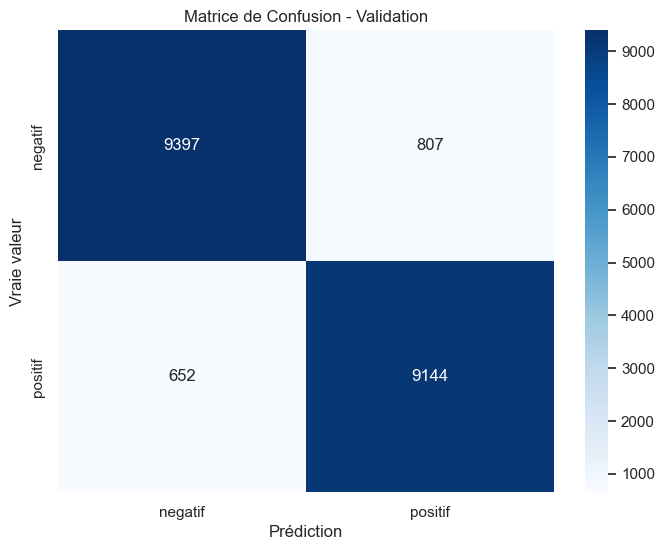

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Création et entraînement du modèle
print("Entraînement du modèle de Régression Logistique...")
model = LogisticRegression(max_iter=1000) # max_iter=1000 pour être sûr qu'il a le temps de converger
model.fit(X_train_vect, y_train)
print("Entraînement terminé.")

# 2. Faire des prédictions sur l'ensemble de VALIDATION
print("\nÉvaluation sur l'ensemble de validation...")
y_pred_valid = model.predict(X_valid_vect)

# 3. Afficher les performances
# Accuracy
accuracy = accuracy_score(y_valid, y_pred_valid)
print(f"\nPrécision (Accuracy) sur la validation : {accuracy:.4f}") # Affiche avec 4 chiffres après la virgule

# Rapport de classification
print("\nRapport de classification sur la validation :")
print(classification_report(y_valid, y_pred_valid, target_names=['negatif', 'positif']))

# Matrice de confusion
print("Matrice de confusion sur la validation :")
cm = confusion_matrix(y_valid, y_pred_valid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'positif'], yticklabels=['negatif', 'positif'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.title('Matrice de Confusion - Validation')
plt.show()


Évaluation finale sur l'ensemble de test...

Précision FINALE (Accuracy) sur le test : 0.9280

Rapport de classification FINAL sur le test :
              precision    recall  f1-score   support

     negatif       0.93      0.93      0.93     10408
     positif       0.92      0.93      0.93      9592

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000

Matrice de confusion FINALE sur le test :


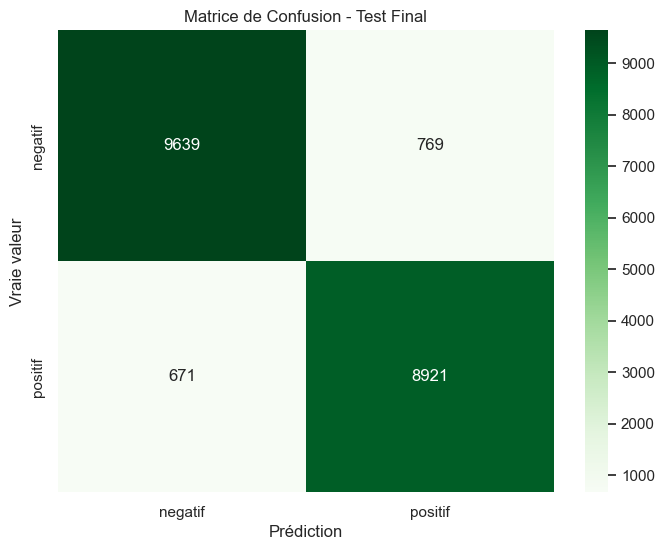

In [16]:
# Faire des prédictions sur l'ensemble de TEST
print("Évaluation finale sur l'ensemble de test...")
y_pred_test = model.predict(X_test_vect)

# Afficher les performances finales
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"\nPrécision FINALE (Accuracy) sur le test : {accuracy_test:.4f}")

print("\nRapport de classification FINAL sur le test :")
print(classification_report(y_test, y_pred_test, target_names=['negatif', 'positif']))

print("Matrice de confusion FINALE sur le test :")
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=['negatif', 'positif'], yticklabels=['negatif', 'positif'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie valeur')
plt.title('Matrice de Confusion - Test Final')
plt.show()

In [17]:
import joblib
import os

# Créer un dossier pour sauvegarder les modèles s'il n'existe pas
output_dir = 'saved_models'
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder le modèle entraîné
path_model = os.path.join(output_dir, 'sentiment_model.joblib')
joblib.dump(model, path_model)

# Sauvegarder le vectoriseur
path_vectorizer = os.path.join(output_dir, 'tfidf_vectorizer.joblib')
joblib.dump(vectorizer, path_vectorizer)

print(f"Modèle sauvegardé dans : {path_model}")
print(f"Vectoriseur sauvegardé dans : {path_vectorizer}")

Modèle sauvegardé dans : saved_models\sentiment_model.joblib
Vectoriseur sauvegardé dans : saved_models\tfidf_vectorizer.joblib
